<a href="https://colab.research.google.com/github/boram-coco/coco1/blob/master/MNIST0_1%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1) 숫자0과 숫자1을 구분하는 네트워크를 아래와 같은 구조로 설계하라

In [1]:
import torch
import torchvision
from fastai.data.all import *
import matplotlib.pyplot as plt

In [24]:
path = untar_data(URLs.MNIST)

In [25]:
zero_fnames = (path/'training/0').ls()
one_fnames = (path/'training/1').ls()

In [27]:
X0 = torch.stack([torchvision.io.read_image(str(zf)) for zf in zero_fnames])
X1 = torch.stack([torchvision.io.read_image(str(of)) for of in one_fnames])
X = torch.concat([X0,X1],axis=0).reshape(-1,1*28*28).float()
y = torch.tensor([0.0]*len(X0) + [1.0]*len(X1)).reshape(-1,1)

In [28]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,1),
    torch.nn.Sigmoid()
)

(2) 아래의 지침에 따라 200 epoch 학습을 진행하라.

손실함수는 BECLoss를 이용할 것. torch.nn.BCELoss() 를 이용할 것.
옵티마이저는 아담으로 설정할 것. 학습률은 lr=0.002로 설정할 것.

In [29]:
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.002)

In [30]:
for epoc in range(200):

        yhat = net(X)
        loss = loss_fn(yhat, y) 
        loss.backward()
        optimizr.step()
        optimizr.zero_grad()

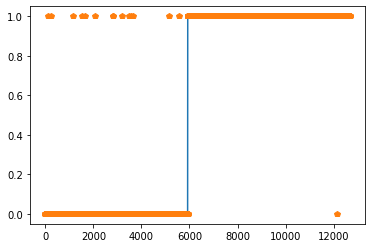

In [31]:
plt.plot(y)
plt.plot(yhat.data,'p')

(3) 아래의 지침에 따라 200 epoch 학습을 진행하라. 학습이 잘 되는가?

손실함수는 BECLoss를 이용할 것. torch.nn.BCELoss()를 사용하지 않고 수식을 직접 입력할 것.
옵티마이저는 아담으로 설정할 것. 학습률은 lr=0.002로 설정할 것.

In [32]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,1),
    torch.nn.Sigmoid()
)

In [33]:
optimizr = torch.optim.Adam(net.parameters(),lr=0.002)

In [34]:
for epoc in range(200):

        yhat = net(X)
        loss = -torch.mean(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))
        loss.backward()
        optimizr.step()
        optimizr.zero_grad()

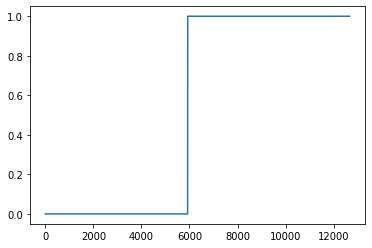

In [35]:
plt.plot(y)
plt.plot(yhat.data,'o')

학습이 안된다.

(4) 아래의 지침에 따라 200 epoch 학습을 진행하라. 학습이 잘 되는가?

이미지의 값을 0과 1사이로 규격화 하라. (Xnp = Xnp/255 를 이용하세요!)
손실함수는 BECLoss를 이용할 것. torch.nn.BCELoss()를 사용하지 않고 수식을 직접 입력할 것.
옵티마이저는 아담으로 설정할 것. 학습률은 lr=0.002로 설정할 것.

In [36]:
X = X/255 

In [37]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,1),
    torch.nn.Sigmoid()
)

In [38]:
optimizr = torch.optim.Adam(net.parameters(),lr=0.002)

In [39]:
for epoc in range(200):

        yhat = net(X)
        loss = -torch.mean(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))
        loss.backward()
        optimizr.step()
        optimizr.zero_grad()

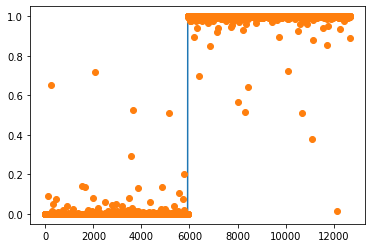

In [40]:
plt.plot(y)
plt.plot(yhat.data,'o')

학습이 잘 된다.

아래와 같은 수식을 이용하여 accuracy를 계산하라.

In [43]:
ytilde = (yhat>0.5)*1
ytilde

tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]])

In [44]:
(ytilde==y)*1


tensor([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]])

In [45]:
torch.sum((ytilde == y)*1) 
torch.sum((ytilde == y)*1)  / len(y)

tensor(0.9995)